In [2]:
import pandas as pd
import spacy as sp
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
from collections import Counter
import nltk
nltk.download('stopwords')
!pip install -q wordcloud
from nltk import FreqDist
import wordcloud
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import learning_curve
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
from IPython.core.display import Path
from mlxtend.plotting import plot_learning_curves
# !pip install -U spacy
import spacy
!python -m spacy download el_core_news_lg
# !pip install torch -q

import torch
import torch.nn as nn
import torch.nn.functional as fuctional
from torch.utils.data import Dataset, DataLoader

import optuna
import torch.optim as optim
from optuna.trial import TrialState
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip


from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from gensim.scripts.glove2word2vec import glove2word2vec

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.6/568.6 MB 1.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_lg')


Εδω γινεται οπως και στην πρωτη εργασια το κομματι τροποποιησης του text σε μορφη που θα ειναι καλυτερη για τον κωδικα

In [3]:
# nowords=[
#     'αλλα', 'αντι', 'απο', 'αυτα', 'αυτες', 'αυτη', 'αυτο', 'αυτον', 'αυτοι', 'αυτος', 'αυτου', 'αυτων', 'δεν', 'δια', 'εαν', 'εγινε', 'εκανε',
#          'ετσι', 'ειμαι', 'ειναι', 'ειχε', 'εκει', 'εξης', 'επι', 'επομενως', 'επισης', 'εσεις', 'εσενα', 'εσυ', 'ευχαριστω', 'εως', 'η', 'η', 'ηδη',
#          'ηταν', 'θα', 'και', 'κατα', 'κατι', 'κατι', 'κι', 'κιολας', 'κοντα', 'κτλ.', 'μα', 'με', 'μεσα', 'μεχρι', 'μη', 'μην', 'μια', 'μου', 'μονο',
#          'ναι', 'να', 'ναι', 'ναι', 'νομιζα', 'ξανα', 'ο', 'οι', 'ολα', 'ολα', 'οποια', 'οποιο', 'οποιος', 'οποιου', 'οποιων', 'οποιως', 'οτι', 'ουτε'
#          , 'παλι', 'παντα', 'πανω', 'περι', 'πολλα', 'πολυ', 'που', 'προς', 'προτου', 'πως', 'σαν', 'σε', 'σεις', 'στη', 'στην', 'στης', 'στις', 'στο', 
#          'στον', 'συν', 'τα', 'τη', 'την', 'της', 'τι', 'τιποτα', 'το', 'τον', 'τοσο', 'τοσο', 'του', 'τους', 'τουτο', 'τουτοι', 'τουτος', 'τουτου', 'τουτων',
#          'τωρα', 'υπερ', 'υπο', 'υποψη', 'χωρις', 'ομως', 'τοτε', 'εκεινο', 'εκεινοι', 'εκεινος', 'εκεινου', 'εκεινων', 'εξαιρεση', 'ειδε', 'ειμαστε', 'ειστε', 'ειχα', 'ειχε', 'εκτος', 'εκτος', 'εξηγησε', 'εξακολουθει', 'εξηγει', 'εξηγησει', 'επιπλεον', 'επισημα', 'επισης', 'επομενο', 'επομενος', 'επομενως', 'επισης', 'επομενο', 'εργασια', 'ερωτησεις', 'εσεις', 'εσενα', 'εσυ', 'ευχαριστω', 'ευρω', 'εφοσον', 'ημερα', 'ημερες', 'ημερας', 'ηλικια', 'ηλικιας', 'ηλικιας', 'ημερομηνια', 'ημερομηνιας', 'ημερων', 'ημιτελης', 'ηδη', 'ηθελα', 'ηθελαν', 'ηθελαν', 'ηθελε', 'ηθελες', 'ηθελες', 'ηθελον', 'ηταν', 'αδιακοπα', 'αι', 'ακομα', 'ακομη', 'ακριβως', 'αληθεια', 'αληθινα', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'αν', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απ', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αργα', 'αργοτερο', 'αριστερα', 'αρκετα', 'αρχικα', 'ας', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γι', 'για', 'γρηγορα', 'γυρω', 'δα', 'δε', 'δεινα', 'δεν', 'δεξια', 'δηθεν', 'δηλαδη', 'δι', 'δια', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγκαιρα', 'εγκαιρως', 'εγω', 'εδω', 'ειδεμη', 'ειθε', 'ειμαι', 'ειμαστε', 'ειναι', 'εις', 'εισαι', 'εισαστε', 'ειστε', 'ειτε', 'ειχα', 'ειχαμε', 'ειχαν', 'ειχατε', 'ειχε', 'ειχες', 'εκαστα', 'εκαστες', 'εκαστη', 'εκαστην', 'εκαστης', 'εκαστο', 'εκαστοι', 'εκαστον', 'εκαστος', 'εκαστου', 'εκαστους', 'εκαστων', 'εκει', 'εκεινα', 'εκεινες', 'εκεινη', 'εκεινην', 'εκεινης', 'εκεινο', 'εκεινοι', 'εκεινον', 'εκεινος', 'εκεινου', 'εκεινους', 'εκεινων', 'εκτος', 'εμας', 'εμεις', 'εμενα', 'εμπρος', 'εν', 'ενα', 'εναν', 'ενας', 'ενος', 'εντελως', 'εντος', 'εντωμεταξυ', 'ενω', 'εξ', 'εξαφνα', 'εξης', 'εξισου', 'εξω', 'επανω', 'επειδη', 'επειτα', 'επι', 'επισης', 'επομενως', 'εσας', 'εσεις', 'εσενα', 'εστω', 'εσυ', 'ετερα', 'ετεραι', 'ετερας', 'ετερες', 'ετερη', 'ετερης', 'ετερο', 'ετεροι', 'ετερον', 'ετερος', 'ετερου', 'ετερους', 'ετερων', 'ετουτα', 'ετουτες', 'ετουτη', 'ετουτην', 'ετουτης', 'ετουτο', 'ετουτοι', 'ετουτον', 'ετουτος', 'ετουτου', 'ετουτους', 'ετουτων', 'ετσι', 'ευγε', 'ευθυς', 'ευτυχως', 'εφεξης', 'εχει', 'εχεις', 'εχετε', 'εχθες', 'εχομε', 'εχουμε', 'εχουν', 'εχτες', 'εχω', 'εως', 'η', 'ηδη', 'ημασταν', 'ημαστε', 'ημουν', 'ησασταν', 'ησαστε', 'ησουν', 'ηταν', 'ητανε', 'ητοι', 'ηττον', 'θα', 'ι', 'ιδια', 'ιδιαν', 'ιδιας', 'ιδιες', 'ιδιο', 'ιδιοι', 'ιδιον', 'ιδιος', 'ιδιου', 'ιδιους', 'ιδιων', 'ιδιως', 'ιι', 'ιιι', 'ισαμε', 'ισια', 'ισως', 'καθε', 'καθεμια', 'καθεμιας', 'καθενα', 'καθενας', 'καθενος', 'καθετι', 'καθολου', 'καθως', 'και', 'κακα', 'κακως', 'καλα', 'καλως', 'καμια', 'καμιαν', 'καμιας', 'καμποσα', 'καμποσες', 'καμποση', 'καμποσην', 'καμποσης', 'καμποσο', 'καμποσοι', 'καμποσον', 'καμποσος', 'καμποσου', 'καμποσους', 'καμποσων', 'κανεις', 'κανεν', 'κανενα', 'κανεναν', 'κανενας', 'κανενος', 'καποια', 'καποιαν', 'καποιας', 'καποιες', 'καποιο', 'καποιοι', 'καποιον', 'καποιος', 'καποιου', 'καποιους', 'καποιων', 'καποτε', 'καπου', 'καπως', 'κατ', 'κατα', 'κατι', 'κατιτι', 'κατοπιν', 'κατω', 'κιολας', 'κλπ', 'κοντα', 'κτλ', 'κυριως', 'λιγακι', 'λιγο', 'λιγωτερο', 'λογω', 'λοιπα', 'λοιπον', 'μα', 'μαζι', 'μακαρι', 'μακρυα', 'μαλιστα', 'μαλλον', 'μας', 'με', 'μεθαυριο', 'μειον', 'μελει', 'μελλεται', 'μεμιας', 'μεν', 'μερικα', 'μερικες', 'μερικοι', 'μερικους', 'μερικων', 'μεσα', 'μετ', 'μετα', 'μεταξυ', 'μεχρι', 'μη', 'μηδε', 'μην', 'μηπως', 'μητε', 'μια', 'μιαν', 'μιας', 'μολις', 'μολονοτι', 'μοναχα', 'μονες', 'μονη', 'μονην', 'μονης', 'μονο', 'μονοι', 'μονομιας', 'μονος', 'μονου', 'μονους', 'μονων', 'μου', 'μπορει', 'μπορουν', 'μπραβο', 'μπρος', 'να', 'ναι', 'νωρις', 'ξανα', 'ξαφνικα', 'ο', 'οι', 'ολα', 'ολες', 'ολη', 'ολην', 'ολης', 'ολο', 'ολογυρα', 'ολοι', 'ολον', 'ολονεν', 'ολος', 'ολοτελα', 'ολου', 'ολους', 'ολων', 'ολως', 'ολωσδιολου', 'ομως', 'οποια', 'οποιαδηποτε', 'οποιαν', 'οποιανδηποτε', 'οποιας', 'οποιασδηποτε', 'οποιδηποτε', 'οποιες', 'οποιεσδηποτε', 'οποιο', 'οποιοδηποτε', 'οποιοι', 'οποιον', 'οποιονδηποτε', 'οποιος', 'οποιοσδηποτε', 'οποιου', 'οποιουδηποτε', 'οποιους', 'οποιουσδηποτε', 'οποιων', 'οποιωνδηποτε', 'οποτε', 'οποτεδηποτε', 'οπου', 'οπουδηποτε', 'οπως', 'ορισμενα', 'ορισμενες', 'ορισμενων', 'ορισμενως', 'οσα', 'οσαδηποτε', 'οσες', 'οσεσδηποτε', 'οση', 'οσηδηποτε', 'οσην', 'οσηνδηποτε', 'οσης', 'οσησδηποτε', 'οσο', 'οσοδηποτε', 'οσοι', 'οσοιδηποτε', 'οσον', 'οσονδηποτε', 'οσος', 'οσοσδηποτε', 'οσου', 'οσουδηποτε', 'οσους', 'οσουσδηποτε', 'οσων', 'οσωνδηποτε', 'οταν', 'οτι', 'οτιδηποτε', 'οτου', 'ου', 'ουδε', 'ουτε', 'οχι', 'παλι', 'παντοτε', 'παντου', 'παντως', 'παρα', 'περα', 'περι', 'περιπου', 'περισσοτερο', 'περσι', 'περυσι', 'πια', 'πιθανον', 'πιο', 'πισω', 'πλαι', 'πλεον', 'πλην', 'ποια', 'ποιαν', 'ποιας', 'ποιες', 'ποιο', 'ποιοι', 'ποιον', 'ποιος', 'ποιου', 'ποιους', 'ποιων', 'πολυ', 'ποσες', 'ποση', 'ποσην', 'ποσης', 'ποσοι', 'ποσος', 'ποσους', 'ποτε', 'που', 'πουθε', 'πουθενα', 'πρεπει', 'πριν', 'προ', 'προκειμενου', 'προκειται', 'προπερσι', 'προς', 'προτου', 'προχθες', 'προχτες', 'πρωτυτερα', 'πως', 'σαν', 'σας', 'σε', 'σεις', 'σημερα', 'σιγα', 'σου', 'στα', 'στη', 'στην', 'στης', 'στις', 'στο', 'στον', 'στου', 'στους', 'στων', 'συγχρονως', 'συν', 'συναμα', 'συνεπως', 'συνηθως', 'συχνα', 'συχνας', 'συχνες', 'συχνη', 'συχνην', 'συχνης', 'συχνο', 'συχνοι', 'συχνον', 'συχνος', 'συχνου', 'συχνου', 'συχνους', 'συχνων', 'συχνως', 'σχεδον', 'σωστα', 'τα', 'ταδε', 'ταυτα', 'ταυτες', 'ταυτη', 'ταυτην', 'ταυτης', 'ταυτο', 'ταυτον', 'ταυτος', 'ταυτου', 'ταυτων', 'ταχα', 'ταχατε', 'τελικα', 'τελικως', 'τες', 'τετοια', 'τετοιαν', 'τετοιας', 'τετοιες', 'τετοιο', 'τετοιοι', 'τετοιον', 'τετοιος', 'τετοιου', 'τετοιους', 'τετοιων', 'τη', 'την', 'της', 'τι', 'τιποτα', 'τιποτε', 'τις', 'το', 'τοι', 'τον', 'τος', 'τοσα', 'τοσες', 'τοση', 'τοσην', 'τοσης', 'τοσο', 'τοσοι', 'τοσον', 'τοσος', 'τοσου', 'τοσους', 'τοσων', 'τοτε', 'του', 'τουλαχιστο', 'τουλαχιστον', 'τους', 'τουτα', 'τουτες', 'τουτη', 'τουτην', 'τουτης', 'τουτο', 'τουτοι', 'τουτοις', 'τουτον', 'τουτος', 'τουτου', 'τουτους', 'τουτων', 'τυχον', 'των', 'τωρα', 'υπ', 'υπερ', 'υπο', 'υποψη', 'υποψιν', 'υστερα', 'φετος', 'χαμηλα', 'χθες', 'χτες', 'χωρις', 'χωριστα', 'ψηλα', 'ω', 'ωραια', 'ως', 'ωσαν', 'ωσοτου', 'ωσπου', 'ωστε', 'ωστοσο', 'ωχ', 
#           'ο', 'η', 'κ',  'εκλογες', 'δεν','γιατι', 'νεα','κανει','χρονια', 'ελλαδα', 'λεει','λεπω','λεμε','ειπα','ειπες','εβαλα','αδιακοπα','αι','ακομα','ακομη','ακριβως','αληθεια','αληθινα','αλλα','αλλαχου','αλλες','αλλη','αλλην','αλλης','αλλιως','αλλιωτικα','αλλο','αλλοι','αλλοιως','αλλοιωτικα','αλλον','αλλος','αλλοτε','αλλου','αλλους','αλλων','αμα','αμεσα','αμεσως','αν','ανα','αναμεσα','αναμεταξυ','ανευ','αντι','αντιπερα','αντις','ανω','ανωτερω','αξαφνα','απ','απεναντι','απο','αποψε','αρα','αραγε','αργα','αργοτερο','αριστερα','αρκετα','αρχικα','ας','αυριο','αυτα','αυτες','αυτη','αυτην','αυτης','αυτο','αυτοι','αυτον','αυτος','αυτου','αυτους','αυτων','αφοτου','αφου','βεβαια','βεβαιοτατα','γι','για','γρηγορα','γυρω','δα','δε','δεινα','δεν','δεξια','δηθεν','δηλαδη','δι','δια','διαρκως','δικα','δικο','δικοι','δικος','δικου','δικους','διολου','διπλα','διχως','εαν','εαυτο','εαυτον','εαυτου','εαυτους','εαυτων','εγκαιρα','εγκαιρως','εγω','εδω','ειδεμη','ειθε','ειμαι','ειμαστε','ειναι','εις','εισαι','εισαστε','ειστε','ειτε','ειχα','ειχαμε','ειχαν','ειχατε','ειχε','ειχες','εκαστα','εκαστες','εκαστη','εκαστην','εκαστης','εκαστο','εκαστοι','εκαστον','εκαστος','εκαστου','εκαστους','εκαστων','εκει','εκεινα','εκεινες','εκεινη','εκεινην','εκεινης','εκεινο','εκεινοι','εκεινον','εκεινος','εκεινου','εκεινους','εκεινων','εκτος','εμας','εμεις','εμενα','εμπρος','εν','ενα','εναν','ενας','ενος','εντελως','εντος','εντωμεταξυ','ενω','εξ','εξαφνα','εξης','εξισου','εξω','επανω','επειδη','επειτα','επι','επισης','επομενως','εσας','εσεις','εσενα','εστω','εσυ','ετερα','ετεραι','ετερας','ετερες','ετερη','ετερης','ετερο','ετεροι','ετερον','ετερος','ετερου','ετερους','ετερων','ετουτα','ετουτες','ετουτη','ετουτην','ετουτης','ετουτο','ετουτοι','ετουτον','ετουτος','ετουτου','ετουτους','ετουτων','ετσι','ευγε','ευθυς','ευτυχως','εφεξης','εχει','εχεις','εχετε','εχθες','εχομε','εχουμε','εχουν','εχτες','εχω','εως','η','ηδη','ημασταν','ημαστε','ημουν','ησασταν','ησαστε','ησουν','ηταν','ητανε','ητοι','ηττον','θα','ι','ιδια','ιδιαν','ιδιας','ιδιες','ιδιο','ιδιοι','ιδιον','ιδιος','ιδιου','ιδιους','ιδιων','ιδιως','ιι','ιιι','ισαμε','ισια','ισως','καθε','καθεμια','καθεμιας','καθενα','καθενας','καθενος','καθετι','καθολου','καθως','και','κακα','κακως','καλα','καλως','καμια','καμιαν','καμιας','καμποσα','καμποσες','καμποση','καμποσην','καμποσης','καμποσο','καμποσοι','καμποσον','καμποσος','καμποσου','καμποσους','καμποσων','κανεις','κανεν','κανενα','κανεναν','κανενας','κανενος','καποια','καποιαν','καποιας','καποιες','καποιο','καποιοι','καποιον','καποιος','καποιου','καποιους','καποιων','καποτε','καπου','καπως','κατ','κατα','κατι','κατιτι','κατοπιν','κατω','κιολας','κλπ','κοντα','κτλ','κυριως','λιγακι','λιγο','λιγωτερο','λογω','λοιπα','λοιπον','μα','μαζι','μακαρι','μακρυα','μαλιστα','μαλλον','μας','με','μεθαυριο','μειον','μελει','μελλεται','μεμιας','μεν','μερικα','μερικες','μερικοι','μερικους','μερικων','μεσα','μετ','μετα','μεταξυ','μεχρι','μη','μηδε','μην','μηπως','μητε','μια','μιαν','μιας','μολις','μολονοτι','μοναχα','μονες','μονη','μονην','μονης','μονο','μονοι','μονομιας','μονος','μονου','μονους','μονων','μου','μπορει','μπορουν','μπραβο','μπρος','να','ναι','νωρις','ξανα','ξαφνικα','ο','οι','ολα','ολες','ολη','ολην','ολης','ολο','ολογυρα','ολοι','ολον','ολονεν','ολος','ολοτελα','ολου','ολους','ολων','ολως','ολωςδιολου','ομως','οποια','οποιαδηποτε','οποιαν','οποιανδηποτε','οποιας','οποιαςδηποτε','οποιδηποτε','οποιες','οποιεςδηποτε','οποιο','οποιοδηποτε','οποιοι','οποιον','οποιονδηποτε','οποιος','οποιοςδηποτε','οποιου','οποιουδηποτε','οποιους','οποιουςδηποτε','οποιων','οποιωνδηποτε','οποτε','οποτεδηποτε','οπου','οπουδηποτε','οπως','ορισμενα','ορισμενες','ορισμενων','ορισμενως','οσα','οσαδηποτε','οσες','οσεςδηποτε','οση','οσηδηποτε','οσην','οσηνδηποτε','οσης','οσηςδηποτε','οσο','οσοδηποτε','οσοι','οσοιδηποτε','οσον','οσονδηποτε','οσος','οσοςδηποτε','οσου','οσουδηποτε','οσους','οσουςδηποτε','οσων','οσωνδηποτε','οταν','οτι','οτιδηποτε','οτου','ου','ουδε','ουτε','οχι','παλι','παντοτε','παντου','παντως','παρα','περα','περι','περιπου','περισσοτερο','περσι','περυσι','πια','πιθανον','πιο','πισω','πλαι','πλεον','πλην','ποια','ποιαν','ποιας','ποιες','ποιο','ποιοι','ποιον','ποιος','ποιου','ποιους','ποιων','πολυ','ποσες','ποση','ποσην','ποσης','ποσοι','ποσος','ποσους','ποτε','που','πουθε','πουθενα','πρεπει','πριν','προ','προκειμενου','προκειται','προπερσι','προς','προτου','προχθες','προχτες','πρωτυτερα','πως','σαν','σας','σε','σεις','σημερα','σιγα','σου','στα','στη','στην','στης','στις','στο','στον','στου','στους','στων','συγχρονως','συν','συναμα','συνεπως','συνηθως','συχνα','συχνας','συχνες','συχνη','συχνην','συχνης','συχνο','συχνοι','συχνον','συχνος','συχνου','συχνου','συχνους','συχνων','συχνως','σχεδον','σωστα','τα','ταδε','ταυτα','ταυτες','ταυτη','ταυτην','ταυτης','ταυτο,ταυτον','ταυτος','ταυτου','ταυτων','ταχα','ταχατε','τελικα','τελικως','τες','τετοια','τετοιαν','τετοιας','τετοιες','τετοιο','τετοιοι','τετοιον','τετοιος','τετοιου','τετοιους','τετοιων','τη','την','της','τι','τιποτα','τιποτε','τις','το','τοι','τον','τος','τοσα','τοσες','τοση','τοσην','τοσης','τοσο','τοσοι','τοσον','τοσος','τοσου','τοσους','τοσων','τοτε','του','τουλαχιστο','τουλαχιστον','τους','τουτα','τουτες','τουτη','τουτην','τουτης','τουτο','τουτοι','τουτοις','τουτον','τουτος','τουτου','τουτους','τουτων','τυχον','των','τωρα','υπ','υπερ','υπο','υποψη','υποψιν','υστερα','φετος','χαμηλα','χθες','χτες','χωρις','χωριστα','ψηλα','ω','ωραια','ως','ωσαν','ωσοτου','ωσπου','ωστε','ωστοσο','ωχ','ο','η','το','τα','τη','δηλαδη','μεχρι','γιατι','εχω','στους','μια','ένας','μία','κάποιος','κάποια','κάποιο','κάποιοι','αυτος','αυτη','αυτο','αυτοι','αυτες','αυτα','στο','στη','στα','για','με','απο','προς','ειναι','εχει','εχουν','θα','δεν','πανω','κατω','μεσα','εξω','κατω','ως','πανω','κατω','πιο','εδω','εκει','πολυ','λιγο','τωρα','ακομα','ομως','επισης','παντα','ακομη','πιθανως','μονο','οχι','ναι','ευχαριστως','γενικα','ολοι','ολες','ολα','ποιος','ποια','ποιο','ποιοι','ποιες','τιποτα','κανεις','καμια','κανενα','κανενες','αυτος','αυτη','αυτο','αυτοι','αυτες','αυτα','απο','σε','υπο','μετα','πριν','επειτα','αντι','εναν','μιαν','κανεναν','καμιαν','κανενα','καμια','μιαν','ενα','οποιος','οποια','οποιο','οποιοι','οποιες','οποιαν','οποιον','ολος','ολη','ολα','ολους','ολες','ολων','καθενας','καθεμια','καθενα','καθενες','ακομα','ενω','επομενως','συνεπως','επιπλεον','παρολα αυτα','παρ ολα αυτα','επισης','και','αλλα','αλλα και','αν','εαν','αν και','αντι','αντι να','αντι το','αντι τα','αντι του','αντι τη','αντι των','αντι στο','αντι στη','αντι στα','αντι στου','αντι στην','αντι στις','αντι στον','μεσω','τους','μας','ηταν','εκ','φορα','πρωτη','ειχα','εμεις','εσεις','ηδη','απ','εγινε','ειχε','αλλα','ουτε','ενας','εσας','αυτοι','αυτο','νεα','οντως','θελετε','κανει','σ','μας','πρεπε','ε','μαλιστα','τους','ηθελε','παω','εβαλε','λεει','γ','ν','θες','ερχεται','διαρκεια','θελουν','ασε','χ','λες','ξερω','α','δω','ειδε','μπηκε','βαλει','μερες','εφοσον','ενα','δυο','τρια','γινει','εργο','μιλαω','μιλησε','ποσα','ωρες','πρωινες','πρωτα','θελει','βαζω','εβαζε','εναντι','μπορεις','βρισκει','δει','μπορω','γινε','κανουν']

nowords=[]
# greek_stopwords = stopwords.words('greek')
# nowords=greek_stopwords
# 
# text editor gia kefalaia kai tonoys
nlp = spacy.load("el_core_news_lg")
def lemmatize(text):
    doc = nlp(text)
    lemmas = []
    for token in doc:
        lemmas.append(token.lemma_)
    return lemmas

def TextProccess(text):
    text =text.strip()
    return text

def PreProccessText(text):
    oldtext=nltk.word_tokenize(text)
    newtext=[]
    for t in oldtext:
        text=t.lower()
        text=text.translate(str.maketrans('άίέύόώή' , 'αιευοωη'))
        if text not in nowords:
            newtext.append(TextProccess(text))
    return newtext

# take files
df = pd.read_csv("/kaggle/input/ys19-2023-assignment-2/train_set.csv", index_col=False)
test_df = pd.read_csv("/kaggle/input/ys19-2023-assignment-2/test_set.csv", index_col=False)
val_df = pd.read_csv("/kaggle/input/ys19-2023-assignment-2/valid_set.csv", index_col=False)

#  metatropi bgazeis @,# kena ,links ktl ktl
test_df['Text']=test_df['Text'].apply(lambda r:re.sub(r'@', ' ', r))
test_df['Text']=test_df['Text'].apply(lambda r:re.sub(r'#', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'[^\w\s]', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'http\S+', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'[0-9]+', ' ', r))
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'_',' ',r)) 
# test_df['Text'] =test_df['Text'].apply(lambda r:re.sub("\s\s+", ' ', r)) 
test_df['Text'] =test_df['Text'].apply(lambda r:re.sub(r'[a-zA-Z]+',' ',r)) 
# test_df['Combined'] = test_df['party'] + test_df['sentiment']

val_df['Text']=val_df['Text'].apply(lambda r:re.sub(r'@', ' ', r))
val_df['Text']=val_df['Text'].apply(lambda r:re.sub(r'#', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'[^\w\s]', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'http\S+', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'[0-9]+', ' ', r))
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'_',' ',r)) 
# val_df['Text'] =val_df['Text'].apply(lambda r:re.sub("\s\s+", ' ', r)) 
val_df['Text'] =val_df['Text'].apply(lambda r:re.sub(r'[a-zA-Z]+',' ',r)) 
# val_df['Combined'] = val_df['party'] + val_df['sentiment']

# df['Combined'] = df['party'] + df['sentiment']
df['Text']=df['Text'].apply(lambda r:re.sub(r'@', ' ', r))
df['Text']=df['Text'].apply(lambda r:re.sub(r'#', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'[^\w\s]', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'http\S+', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'[0-9]+', ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'_',' ',r)) 
# df['Text'] = df['Text'].apply(lambda r:re.sub("\s\s+", ' ', r))
df['Text'] = df['Text'].apply(lambda r:re.sub(r'[a-zA-Z]+',' ',r)) 
# metatrepis sentiment se numbers kai to idio gia to party
df['sentiment']=df.Sentiment.map({
    'POSITIVE':2,
    'NEUTRAL':1,
    'NEGATIVE':0  
})
df['party']=df.Party.map({
    'SYRIZA':1,
    'ND':2,
    'KKE':3,
    'PASOK':4,
    'DIEM':5,
    'ELL_LYSI':6        
})
test_df['party']=test_df.Party.map({
    'SYRIZA':1,
    'ND':2,
    'KKE':3,
    'PASOK':4,
    'DIEM':5,
    'ELL_LYSI':6       
})
val_df['party']=val_df.Party.map({
      'SYRIZA':1,
    'ND':2,
    'KKE':3,
    'PASOK':4,
    'DIEM':5,
    'ELL_LYSI':6      
})
val_df['sentiment']=val_df.Sentiment.map({
    'POSITIVE':2,
    'NEUTRAL':1,
    'NEGATIVE':0  
})


# perneis 90% ton test
# Text_train,Text_val,Sentiment_train,Sentiment_val,Party_test,Party_val= train_test_split(df['Text'] ,df['sentiment'],df['party'],random_state=1000 , test_size=0.1,stratify=df.sentiment,shuffle=True)
Text_train=df['Text'] 
Text_val=val_df['Text']
Sentiment_train=df['sentiment'] 
Sentiment_val=val_df['sentiment'] 
Text_sub=test_df['Text']
# metatrepis ta text
Tweets=[]
for text in Text_train:
    we=lemmatize(" ".join(PreProccessText(text)))
    Tweets.append(we)

Tweets_test=[]
for text in Text_val:
    we=lemmatize(" ".join(PreProccessText(text)))
    Tweets_test.append(we)   

Tweets_sub=[]
for text in Text_sub:
    we=lemmatize(" ".join(PreProccessText(text)))
    Tweets_sub.append(we)   

    



Εδω θα γινει το vectorizer δηλαδη μετατροπη του text σε αριθμους με το word2vec


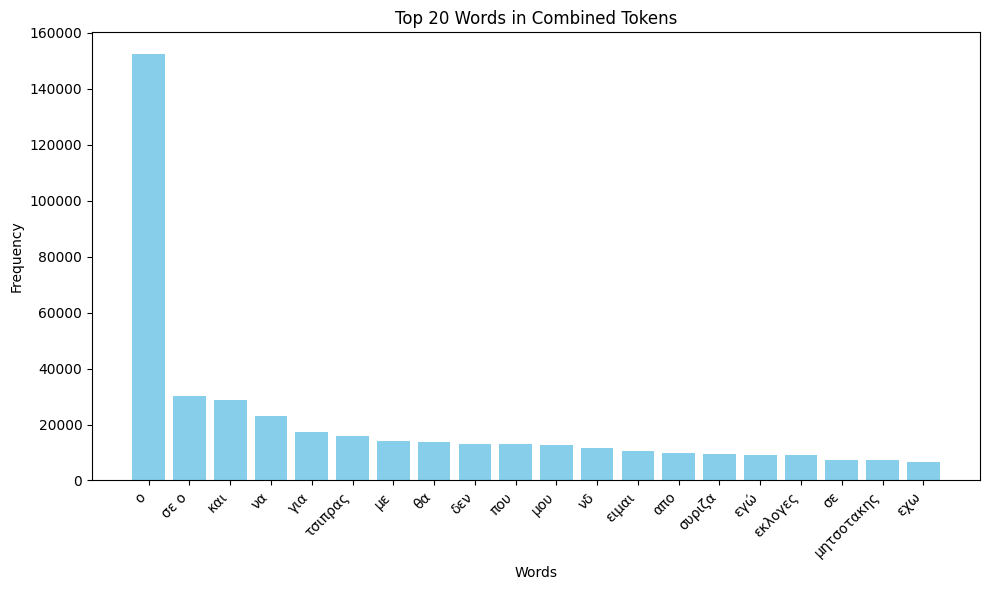

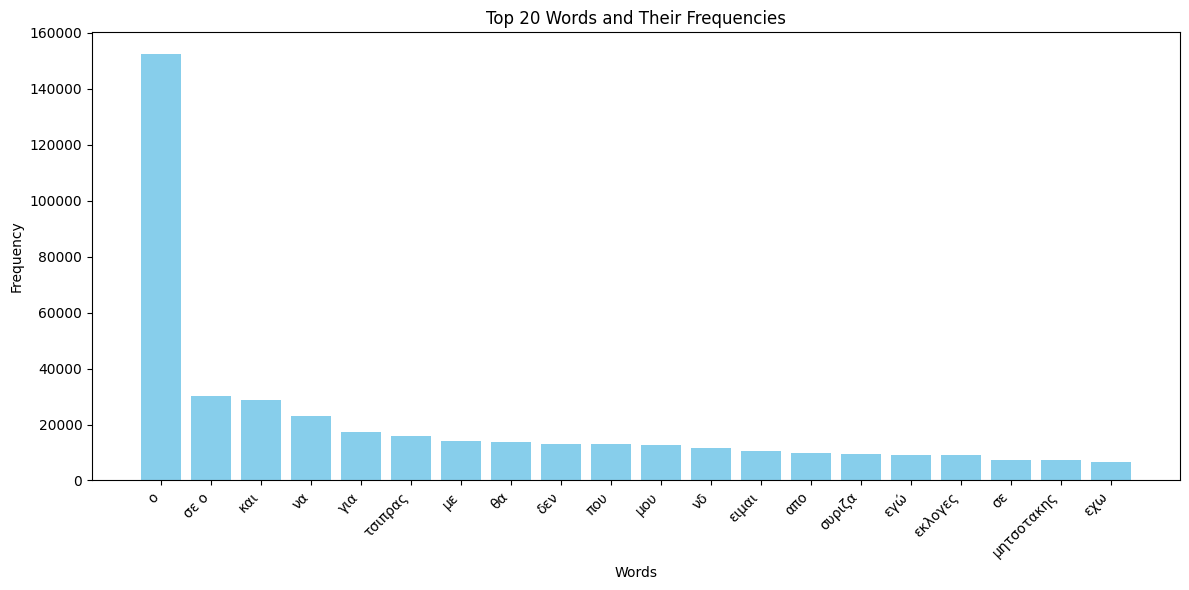

In [4]:
# for word count

all_tokens = [token for sublist in Tweets for token in sublist]
all_tokens2 = [token for sublist in Tweets_test for token in sublist]
all_tokens3 = [token for sublist in Tweets_sub for token in sublist]
# Create a frequency distribution
all_tok=all_tokens+all_tokens2+all_tokens3

top_n = 20  
word_freq_combined = Counter(all_tok)
top_words_combined = dict(word_freq_combined.most_common(top_n))

plt.figure(figsize=(10, 6))
plt.bar(top_words_combined.keys(), top_words_combined.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words in Combined Tokens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# για συνχωτιτα

freq_dist = FreqDist(all_tok)
top_n = 20  # Change this value as needed
top_words = dict(freq_dist.most_common(top_n))

plt.figure(figsize=(12, 6))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Words and Their Frequencies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [5]:

# ena ena tweet ############################################
# a #############################
all_words=[]
w=0
# edo ftiaxno ta text na einai ola mazi se token to token 
for text in Tweets:
    if w<len(text):
        w=len(text)
    for a in text:
        all_words.append(a)
# 
for text in Tweets_test:
    if w<len(text):
        w=len(text)
    for a in text:
        all_words.append(a)
#  
for text in Tweets_sub:
    if w<len(text):
        w=len(text)
    for a in text:
        all_words.append(a) 
# edo ta metatrepo 
model = Word2Vec(sentences=[all_words], vector_size=100, window=10, min_count=1, workers=5)


# edo ta bazo se listes ta vector
Tweets_train=[]
for text in Tweets:
    Tweets_one=[]
    for a in text:
        vector = model.wv[a]
        Tweets_one.append(vector)
    Tweets_train.append(Tweets_one)
    

Tweets_val=[]
for text in Tweets_test:
    Tweets_one=[]
    for a in text:
        vector = model.wv[a]
        Tweets_one.append(vector)
    Tweets_val.append(Tweets_one)
    

Tweets_to_test=[]
for text in Tweets_sub:
    Tweets_one=[]
    for a in text:
        vector = model.wv[a]
        Tweets_one.append(vector)
    Tweets_to_test.append(Tweets_one)        


59


In [31]:


# ftiaxno to padding
numbers=[]
for p in range(len(Tweets_train[0][0])):
    numbers.append(0)

    
#     edo ta kano idio megethos p.x 51 lexeis ola 
c=[]   
q=Tweets_train[:]
for j in range(len(q)):
    ca=[]
    for b in q[j]:
        ca.extend(b)
            
    for i in range(len(q[j]),w):
        ca.extend(numbers)     
    c.append(ca)

c_val=[]   
q_val=Tweets_val[:]
for j in range(len(q_val)):
    ca=[]
    for b in q_val[j]:
        ca.extend(b)
            
    for i in range(len(q_val[j]),w):
        ca.extend(numbers)     
    c_val.append(ca)

    
c_test=[]   
q_test=Tweets_to_test[:]
for j in range(len(q_test)):
    ca=[]
    for b in q_test[j]:
        ca.extend(b)
            
    for i in range(len(q_test[j]),w):
        ca.extend(numbers)     
    c_test.append(ca)
#   edo brisko to athrisma 
d=[] 
for a in q:
    ten=np.array(numbers[:])
    for b in a:
        b2=np.array(b)
        ten=ten+b2
    d.append(ten.tolist())

d_val=[]    
for a in q_val:
    ten=np.array(numbers[:])
    for b in a:
        b2=np.array(b)
        ten=ten+b2
    d_val.append(ten.tolist())

d_test=[]    
for a in q_test:
    ten=np.array(numbers[:])
    for b in a:
        b2=np.array(b)
        ten=ten+b2
    d_test.append(ten.tolist())   

#  edo brisko to meso oro
e=[] 
for a in q:
    ten=np.array(numbers[:])
    t=0
    for b in a:
        t=t+1
        b2=np.array(b)
        ten=ten+b2
    ten=np.divide(ten,t)
    e.append(ten.tolist())

e_val=[]    
for a in q_val:
    ten=np.array(numbers[:])
    t=0
    for b in a:
        t=t+1
        b2=np.array(b)
        ten=ten+b2
    ten=np.divide(ten,t)
    e_val.append(ten.tolist())
        
e_test=[]    
for a in q_test:
    ten=np.array(numbers[:])
    t=0
    for b in a:
        t=t+1
        b2=np.array(b)
        ten=ten+b2
    ten=np.divide(ten,t)
    e_test.append(ten.tolist())


In [7]:
class NEW_Model2(nn.Module):
#     h=hiden layer
    def __init__(self,number_features,h1,h2,h3,number_outpout=3):
        super().__init__()
        self.fc1=nn.Linear(number_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,h3)
        self.out=nn.Linear(h3,number_outpout)
    def forward(self,x):
        x=fuctional.relu(self.fc1(x))
        x=fuctional.relu(self.fc2(x))
        x=fuctional.relu(self.fc3(x))
        x=self.out(x)
        return x

In [33]:
# linear_combine einai h enosi party me vector
def linear_combine(x,y):
    le2=[]
    for i in range(len(y)):
        le=[]
        for j in x[i]:
            le.append((j+y[i])/6)
        le2.append(le)
    la=torch.tensor(le2,dtype=torch.float)
    return la


# edo ta kano se tensor type
TE=linear_combine(d,df['party'].values)
test_torch=torch.tensor(TE)
YW=torch.LongTensor(Sentiment_train.values)

# val
TV=linear_combine(d_val,val_df['party'].values)
test_val=torch.tensor(TV)
SV=torch.LongTensor(Sentiment_val.values)

TT=linear_combine(d_test,test_df['party'].values)
test_test=torch.tensor(TT)


# create dataset
dataset=torch.utils.data.TensorDataset(test_torch,YW)
# einai h diafora ama htan ena vector me athrisma h meso oro enantion padding poy tha exei p.x 50 lexeis ara w*100
inp=100

/tmp/ipykernel_47/1667425863.py:15: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_47/1667425863.py:20: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/tmp/ipykernel_47/1667425863.py:24: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



In [ ]:
def objective(trial):
#     5000 -> 10.000
    lr=trial.suggest_float('lr',0.001 ,0.1,log=True)
    number_trials =trial.suggest_int('number_trials',2000 ,10000)
    loss_toll=trial.suggest_int('loss_toll',1 ,3)
    optimizer_name= trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    h1 = trial.suggest_int('h1',3,100)
    h2 = trial.suggest_int('h2',3,80)
    h3 = trial.suggest_int('h3',3,50)
    bs = trial.suggest_int('bs',3,10)
    dataloader=torch.utils.data.DataLoader(dataset,batch_size=bs)
    cr=nn.CrossEntropyLoss()
    mod = NEW_Model2(inp,h1,h2,h3,3)
    opt = getattr(optim, optimizer_name)(mod.parameters(), lr=lr)
    best_loss=2
    tolls=0
    for i in range(number_trials):
#         for text,sent in dataloader:
            y_pred=mod.forward(test_torch)   
            l=cr(y_pred,YW)
            if l<best_loss:
                best_loss=l
            else:
                tolls=tolls+1
            if tolls>loss_toll:
                break
            opt.zero_grad()
            l.backward()
            opt.step()
    
    correct=0
    with torch.no_grad():
        for i ,data in enumerate(test_val):
            y_val=mod.forward(data)
            if y_val.argmax().item()==SV[i]:
                correct+=1
    
    return correct/len(SV)
    


optuna_sample=optuna.create_study(direction='maximize')
optuna_sample.optimize(objective, n_trials=500)

[I 2023-12-22 22:04:07,986] A new study created in memory with name: no-name-8a657b8e-bc11-4299-9198-b795a70befb1
[I 2023-12-22 22:04:08,934] Trial 0 finished with value: 0.3333333333333333 and parameters: {'lr': 0.006368685359770091, 'number_trials': 3138, 'loss_toll': 2, 'optimizer': 'RMSprop', 'h1': 31, 'h2': 56, 'h3': 50, 'bs': 7}. Best is trial 0 with value: 0.3333333333333333.
[I 2023-12-22 22:04:09,835] Trial 1 finished with value: 0.3237767584097859 and parameters: {'lr': 0.042680235222072614, 'number_trials': 8692, 'loss_toll': 3, 'optimizer': 'RMSprop', 'h1': 58, 'h2': 32, 'h3': 13, 'bs': 6}. Best is trial 0 with value: 0.3333333333333333.
[I 2023-12-22 22:05:22,535] Trial 2 finished with value: 0.3597094801223242 and parameters: {'lr': 0.006330934866757364, 'number_trials': 4246, 'loss_toll': 3, 'optimizer': 'SGD', 'h1': 33, 'h2': 53, 'h3': 14, 'bs': 5}. Best is trial 2 with value: 0.3597094801223242.
[I 2023-12-22 22:06:10,229] Trial 3 finished with value: 0.343081039755351

In [41]:
optuna.visualization.plot_optimization_history(optuna_sample) 

In [ ]:
optuna.visualization.plot_slice(optuna_sample,params=['lr','number_trials','loss_toll','optimizer','h1','h2','h3','bs'])

εδω εβαλα ποιο αναλυτικα τα αποτελεσματα των πηραματων μου
me 3 levels #################################################
    OLA TA VALUES MAZI ME DATALOADER #################################################
        100 shuffle on 
        values=[0.3623853211009174],
        {'lr': 0.0019115227903461032, 'number_trials': 2623, 'loss_toll': 2, 'optimizer': 'Adam', 'h1': 20, 'h2': 53, 'h3': 35, 'bs': 6}
        δοκιμη μονος μου  33        
    PROSTHESI MAZI ME DATALOADER#################################################
        100 shuffle of         
         values=[0.3614296636085627]
        {'lr': 0.014041432312379906, 'number_trials': 2164, 'loss_toll': 2, 'optimizer': 'SGD', 'h1': 22, 'h2': 80, 'h3': 11, 'bs': 3}
         δοκιμη μονος μου 34

    OLA TA VALUES XORIS DATALOADER  ##########################################
        25
        value: 0.36563455657492355 
        {'lr': 0.008726756859066598, 'number_trials': 2404, 'loss_toll': 1,'optimizer': 'SGD', 'h1': 43, 'h2': 20, 'h3': 40, 'bs': 4}. 

    PROSTHESI XORIS DATALOADER#################################################
        100
             values=[0.36448776758409784], 
            {'lr': 0.005353747230667821, 'number_trials': 1981, 'loss_toll': 1, 'optimizer': 'SGD', 'h1': 55, 'h2': 58, 'h3': 46, 'bs': 4}
            36
    MESOS OROS XORIS DATALOADER#################################################
         values=[0.3444189602446483]
        {'lr': 0.001737823842417912, 'number_trials': 2196, 'loss_toll': 2, 'optimizer': 'RMSprop', 'h1': 37, 'h2': 63, 'h3': 3, 'bs': 7}


2 LEVEL #################################################
    athrisma 100 values=[0.3642966360856269]
        {'lr': 0.024409564209881118, 'number_trials': 2906, 'loss_toll': 3, 'optimizer': 'SGD', 'h1': 82, 'h2': 59, 'h3': 17, 'bs': 9}
    values 100  values=[0.3642966360856269]
        {'lr': 0.024409564209881118, 'number_trials': 2906, 'loss_toll': 3, 'optimizer': 'SGD', 'h1': 82, 'h2': 59, 'h3': 17, 'bs': 9}
    meso oro  values=[0.34613914373088683] 100 
        {'lr': 0.0516578848935661, 'number_trials': 2079, 'loss_toll': 1, 'optimizer': 'SGD', 'h1': 96, 'h2': 12, 'h3': 4, 'bs': 9}

1 LEVEL #################################################
    all values 0.36811926605504586  13 trails
        {'lr': 0.001559101259090533, 'number_trials': 904, 'loss_toll': 2, 'optimizer': 'SGD', 'h1': 97, 'h2': 51, 'h3': 45, 'bs': 10}
    arthisma values=[0.36410550458715596] 100 trails
         {'lr': 0.023847947665755855, 'number_trials': 982, 'loss_toll': 3, 'optimizer': 'SGD', 'h1': 51, 'h2': 22, 'h3': 50, 'bs': 6}
    meso oro   values=[0.3459480122324159] 100
        {'lr': 0.0041851026739183955, 'number_trials': 3162, 'loss_toll': 3, 'optimizer': 'SGD', 'h1': 19, 'h2': 24, 'h3': 8, 'bs': 3}
me party
    athrisma values=[0.3809250764525994]
        {'lr': 0.0010333790344898776, 'number_trials': 2215, 'loss_toll': 2, 'optimizer': 'Adam', 'h1': 23, 'h2': 42, 'h3': 42, 'bs': 5}
    athrisma /6 values=[0.38073394495412843]
        {'lr': 0.0016303124313371237, 'number_trials': 90, 'loss_toll': 1, 'optimizer': 'Adam', 'h1': 58, 'h2': 32, 'h3': 43, 'bs': 3}
all_values  values=[0.37576452599388377]
{'lr': 0.050209305698213844, 'number_trials': 6202, 'loss_toll': 1, 'optimizer': 'SGD', 'h1': 51, 'h2': 61, 'h3': 28, 'bs': 9}

In [42]:


print(len(optuna_sample.trials))
print(optuna_sample.best_trial)
print(optuna_sample.best_params)
best=optuna_sample.best_params


best_lr=best['lr']
best_number_trials=best['number_trials']
best_toll=best['loss_toll']
best_optimizer=best['optimizer']
best_h1=best['h1']
best_h2=best['h2']
best_h3=best['h3']
best_bs=best['bs']


371
FrozenTrial(number=148, state=TrialState.COMPLETE, values=[0.3837920489296636], datetime_start=datetime.datetime(2023, 12, 22, 20, 41, 16, 182996), datetime_complete=datetime.datetime(2023, 12, 22, 20, 41, 21, 253614), params={'lr': 0.0014138898710040866, 'number_trials': 8729, 'loss_toll': 2, 'optimizer': 'Adam', 'h1': 41, 'h2': 37, 'h3': 37, 'bs': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lr': FloatDistribution(high=0.1, log=True, low=0.001, step=None), 'number_trials': IntDistribution(high=10000, log=False, low=2000, step=1), 'loss_toll': IntDistribution(high=3, log=False, low=1, step=1), 'optimizer': CategoricalDistribution(choices=('Adam', 'RMSprop', 'SGD')), 'h1': IntDistribution(high=100, log=False, low=3, step=1), 'h2': IntDistribution(high=80, log=False, low=3, step=1), 'h3': IntDistribution(high=50, log=False, low=3, step=1), 'bs': IntDistribution(high=10, log=False, low=3, step=1)}, trial_id=148, value=None)
{'lr': 0.0014138898710040866,

In [53]:
torch.manual_seed(69)

mod = NEW_Model2(inp,best_h1,best_h2,best_h3)
cr=nn.CrossEntropyLoss()
opt=opt = getattr(optim, best_optimizer)(mod.parameters(),lr=best_lr)
runs=best_number_trials # or epochs
loss=[]
dataloader=torch.utils.data.DataLoader(dataset,batch_size=best_bs,shuffle=True)
best_loss=best_toll+2
tolls=0
for i in range(runs):
#     for text,sent in dataloader:
        y_pred=mod.forward(test_torch)   
        l=cr(y_pred,YW)
        loss.append(l.detach().numpy())
        if i%50==0:
            print(i,l)
        if l<best_loss:
            best_loss=l
        else:
            tolls=tolls+1
        if tolls>best_toll:
            break
        opt.zero_grad()
        l.backward()
        opt.step()

# plt.plot(range(len(loss)),loss)   

correct=0
Y_all=[]
with torch.no_grad():
    for i ,data in enumerate(test_val):
        y_val=mod.forward(data)
#         print(f'{i+1} , {str(y_val)} \t {Y_test[i]} \t {y_val.argmax().item()}')
        if y_val.argmax().item()==SV[i]:
            correct+=1
        Y_all.append(y_val.argmax().item())



print(f'correct {correct} out of {len(SV)}')
print(correct/len(SV))
print(classification_report(Sentiment_val,Y_all))

0 tensor(1.1041, grad_fn=<NllLossBackward0>)
50 tensor(1.0954, grad_fn=<NllLossBackward0>)
100 tensor(1.0927, grad_fn=<NllLossBackward0>)
correct 1979 out of 5232
0.37824923547400613
              precision    recall  f1-score   support

           0       0.37      0.49      0.43      1744
           1       0.40      0.27      0.32      1744
           2       0.37      0.38      0.37      1744

    accuracy                           0.38      5232
   macro avg       0.38      0.38      0.37      5232
weighted avg       0.38      0.38      0.37      5232



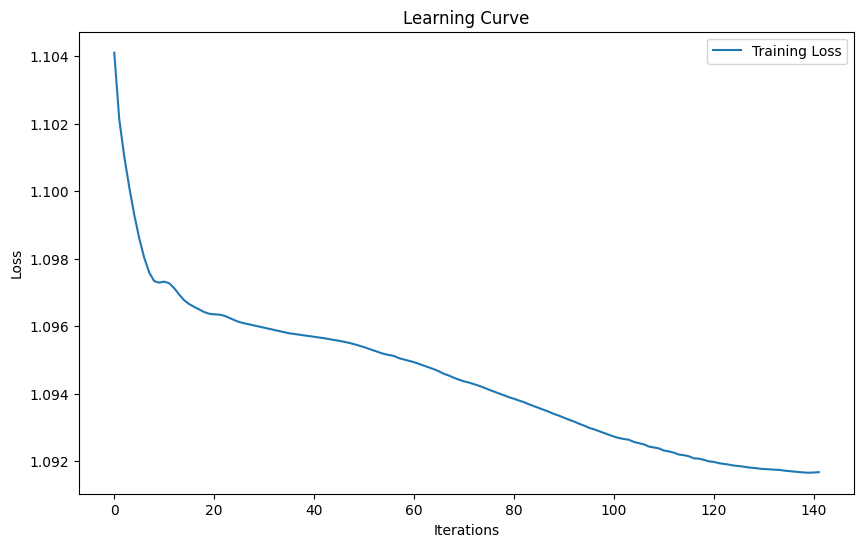

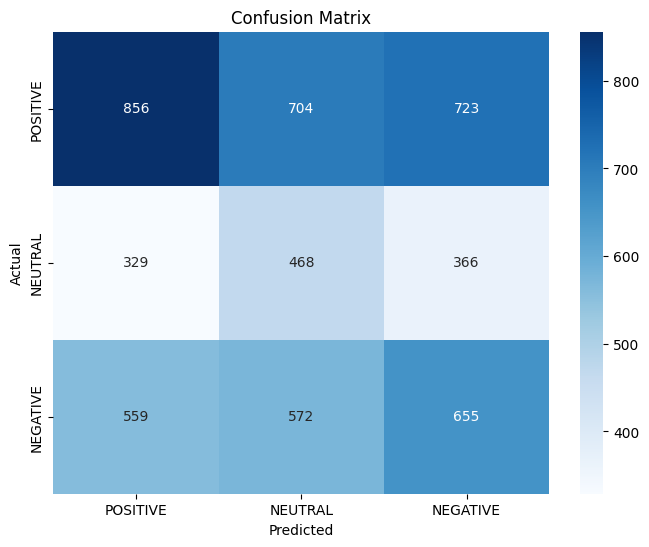

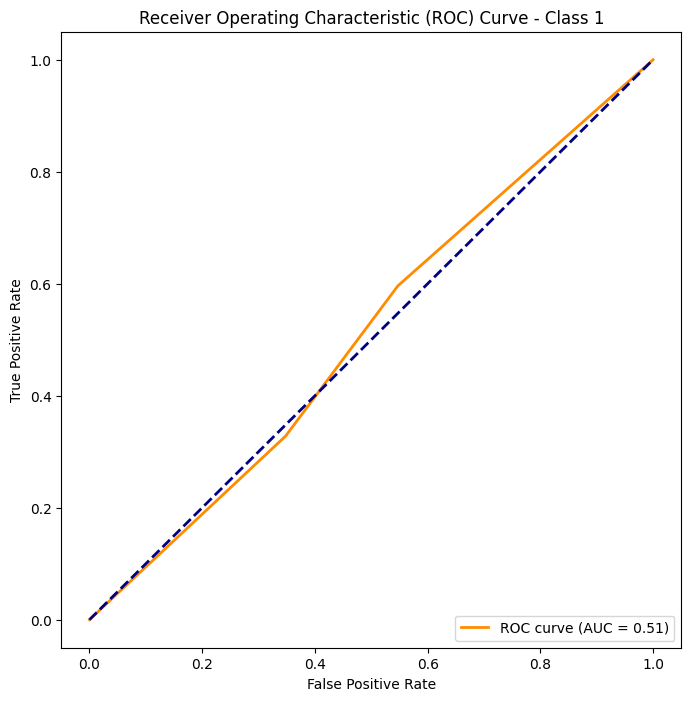

AUC: 0.51


In [54]:
# print learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.title('Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


# print confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_all, Sentiment_val)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['POSITIVE','NEUTRAL', 'NEGATIVE'], yticklabels=['POSITIVE','NEUTRAL', 'NEGATIVE'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# print roc_curve
def custom_roc_curve(y_true, y_scores, class_index=1, plot=True):
    binary_y_true = (y_true == class_index).astype(int)
    fpr_values, tpr_values, thresholds = roc_curve(binary_y_true, y_scores)
    roc_auc = auc(fpr_values, tpr_values)

    if plot:
        plt.figure(figsize=(8, 8))
        plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - Class {class_index}')
        plt.legend(loc='lower right')
        plt.show()

    return fpr_values, tpr_values, roc_auc
from sklearn.metrics import  auc
# Example usage for binary classification problem (class_index=1)
fpr_custom, tpr_custom, roc_auc_custom = custom_roc_curve(Sentiment_val, Y_all, class_index=1)
print(f"AUC: {roc_auc_custom:.2f}")

In [55]:
SUB=[]
with torch.no_grad():
    for i ,data in enumerate(test_test):
        y_test=mod.forward(data)
        SUB.append(y_test.argmax().item())
        

pred=[]
for pe in SUB:
    if pe==1:
        pred.append('NEUTRAL')
    if pe==2:
        pred.append('POSITIVE')     
    if pe==0:
        pred.append('NEGATIVE') 

data = pd.Series(pred)
SUB=test_df[['New_ID']]
SUB.rename(columns = {'New_ID':'Id'}, inplace = True)
SUB["Predicted"]=data
SUB.to_csv("submission.csv",index=None)

/tmp/ipykernel_47/2956344545.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_47/2956344545.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

